#  Author:- Suwarna Sunil Baraskar

# Task 1 :- Prediction For the IRIS dataset using Decision Tree Algorithm.

# GRIP @ The Sparks Foundation (Data Science & Business Analytics Internship)

Decision Tree are supervised machine learning thar performs both classification & regression tasks.For the given IRIS dataset created the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
 
Liabrires Used:- Numpy,Pandas,Scikit-learn,Matplotlib,Seaborn,pydot





In [184]:
#import operating system
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [185]:
#importing current working directory
os.chdir("C:\\Users\\HP\\Desktop\\letsupgrade_python")
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [186]:
#Importing the liabrires

import numpy as np #(data manipulation)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #(data visualization)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #(model building part)
from sklearn.tree import DecisionTreeClassifier#(for decision tree model)
from sklearn.metrics import confusion_matrix,accuracy_score
import pydot
from IPython.display import Image #( the goal to convert the given tree in a list-expression into the visualization)
%matplotlib inline

In [187]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [188]:
#Loadind the dataset
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [190]:
print(dataset.shape)

(150, 6)


In [191]:
# checking missing values
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [192]:
dataset.value_counts()  (### Finding unique value counts of each element)

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
                                                                                 ..
100  5.7            2.8           4.1            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
1    5.1            3.5           1.4            0.2           Iris-setosa       

In [193]:
dataset.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [194]:
dataset.describe() #(The describe() function computes a summary of statistics pertaining to the DataFrame)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


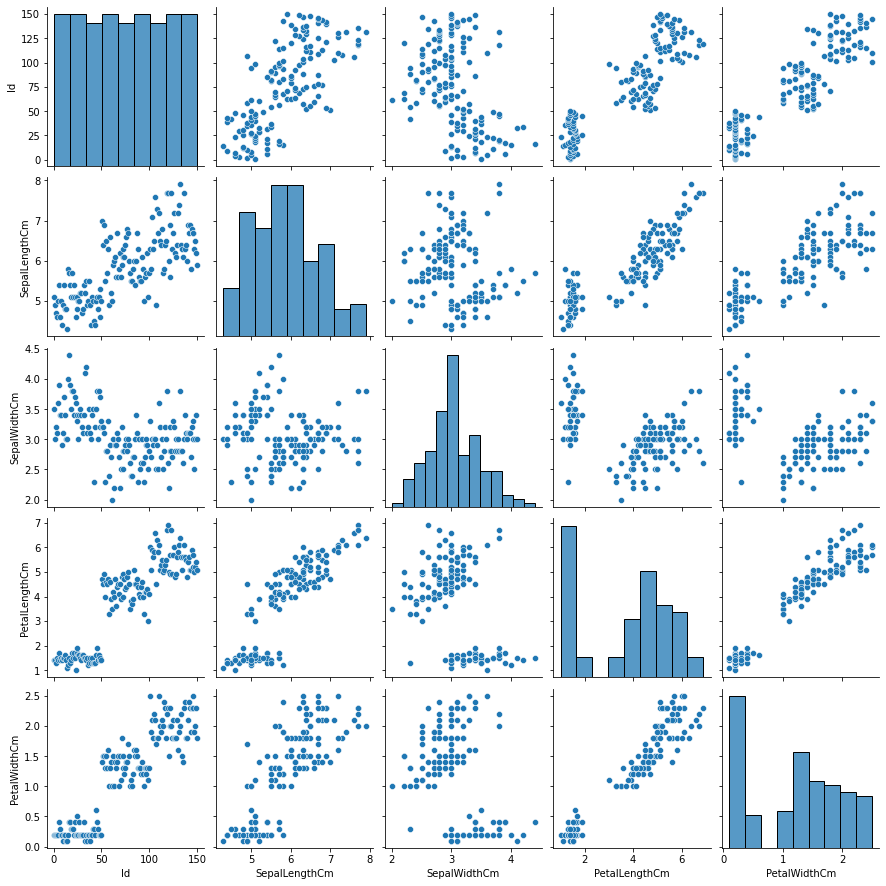

In [195]:
#Data Visualization(Creating a pairplot with seaborn)
sns.pairplot(dataset)


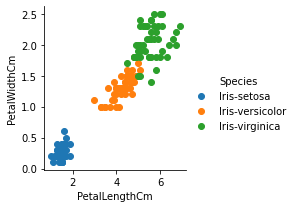

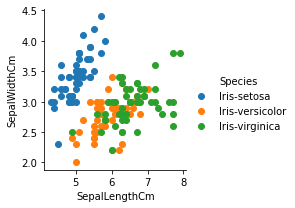

In [196]:
#Scatter plot based on petal length and petal width
sns.FacetGrid(dataset,hue='Species').map (plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

#Scatter plot based on sepal length and sepal width
sns.FacetGrid(dataset,hue='Species').map (plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()


In [197]:
#Dropping ID column bec no need for data analysis
dataset.drop(['Id'],axis=1,inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [198]:
target=dataset['Species']
x = dataset.drop('Species',axis=1)


In [199]:
## split the data into independent_variable (x) and dependent_variable (y)
x = dataset.drop('Species',axis=1)
y = dataset['Species']

In [200]:
# split the data into training75% and testing25%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [201]:
x_train.shape
x_test.shape


(38, 4)

In [202]:
y_train.shape
y_test.shape

(38,)

# Decision Tree Algorithm

In [203]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)

In [204]:
#importing packages for visualization
from IPython.display import Image
import pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


# Visualization Part


In [205]:
export_graphviz(dt,out_file="dt.dot",
                     feature_names=x.columns,
                     class_names=target,
                    filled = True)

import pydot
(graph,) = pydot.graph_from_dot_file('dt.dot')
graph.write_png('dt.png')   

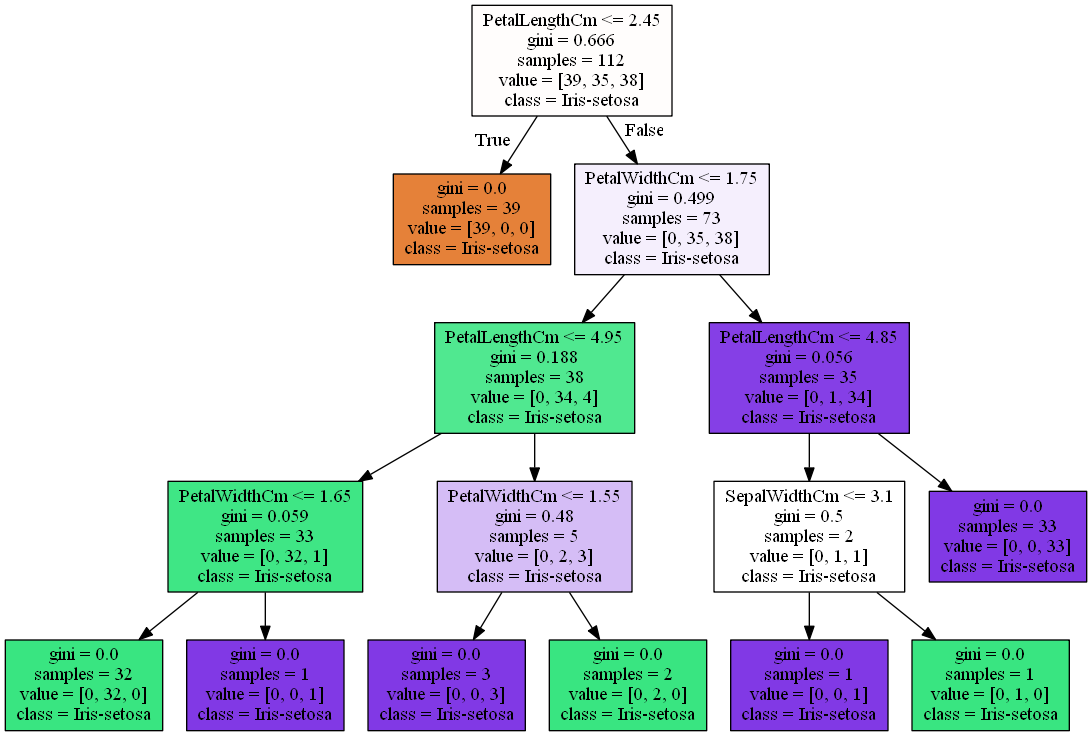

In [206]:
Image(filename='dt.png')

In [207]:
#Making prediction
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [208]:
#Accuracy and confusion matrix check(Train)
print(accuracy_score(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

1.0


array([[39,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 38]], dtype=int64)

In [209]:
##Accuracy and confusion matrix check(Test)
print(accuracy_score(y_test,y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.9736842105263158


array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 11]], dtype=int64)

In [210]:
### (is used to measure the quality of predictions from a classification algorithm)
from sklearn.metrics import classification_report

In [211]:
print('Report:',classification_report(y_test,y_test_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



# ## There is no overfitting problem in IRIS dataset because trainning accuracy is 100 % and test accuracy is 97%,Hence the model gives actual fit result.

# THANKYOU